# Author : Khushi Jain

# Create the Decision Tree classifier and visualize it graphically.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve

from sklearn.metrics import accuracy_score,precision_recall_curve,cohen_kappa_score,recall_score,r2_score

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=[15,8]

In [2]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Shape 
df.shape

(150, 6)

Data has 150 records and six Vairables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Checking Null Values

In [6]:
df.isnull().sum()/len(df)


Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

##  data visualization

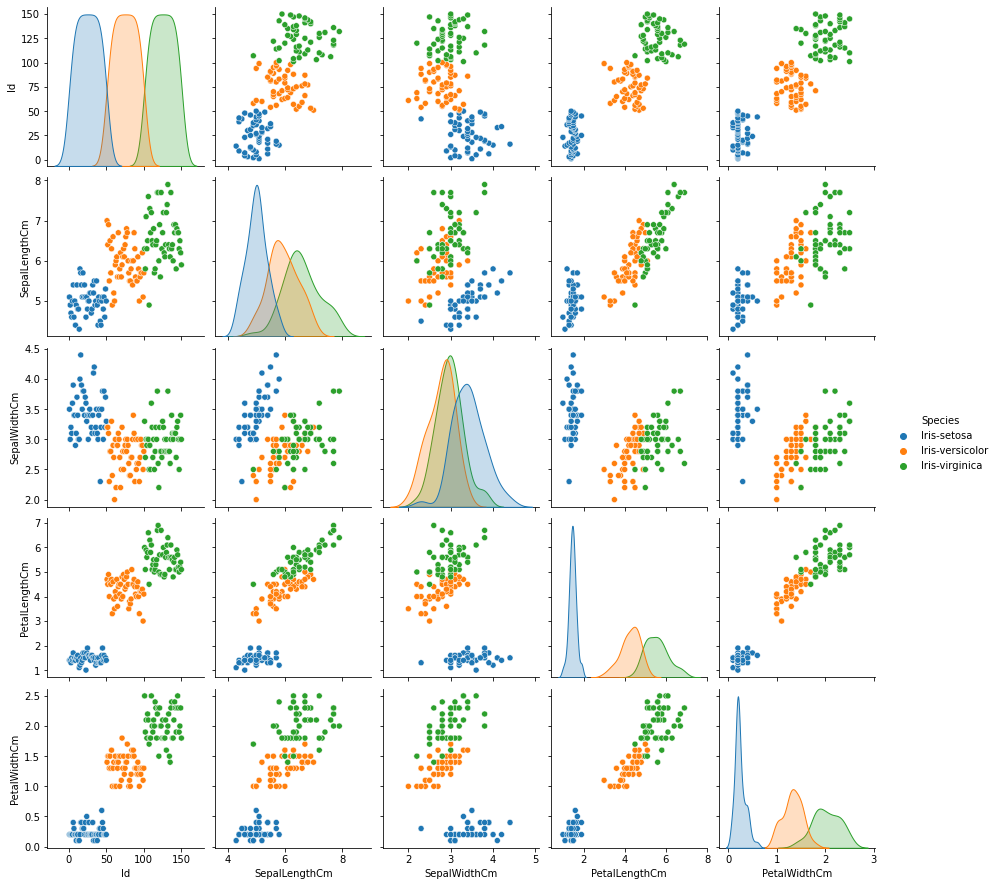

In [7]:
sns.pairplot(df, hue='Species')
plt.show()

We can observe that speciesv "Iris Setosa" makes a distinctive cluster in every parameter, while other two species overlap a bit each other.

In [8]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


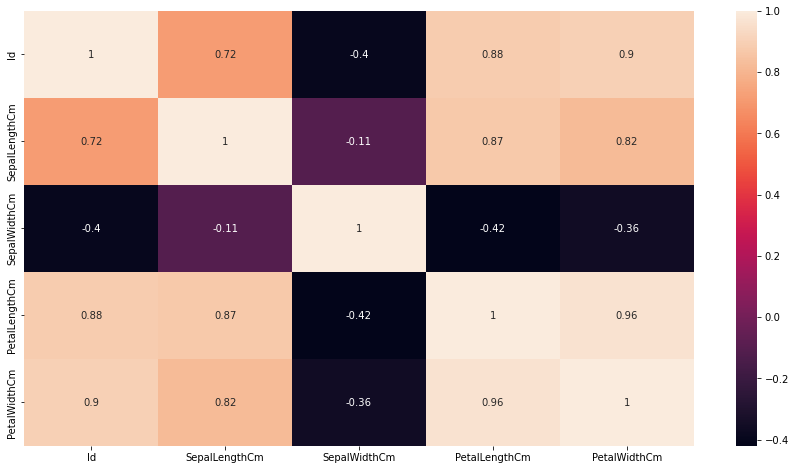

In [9]:
sns.heatmap(df.corr(),annot=True)
plt.show()

We observed that: (i)Petal length is highly related to petal width (ii)Sepal length is not related to sepal width

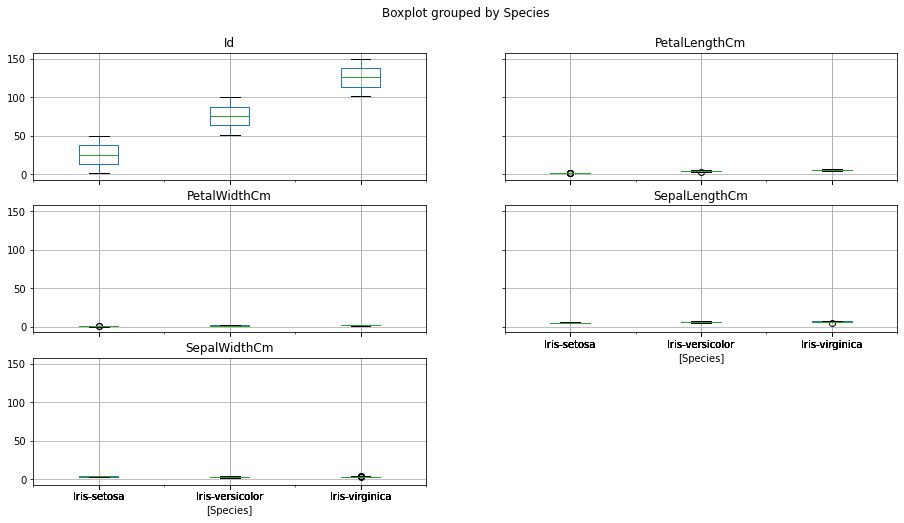

In [11]:
df.boxplot(by='Species')
plt.show()

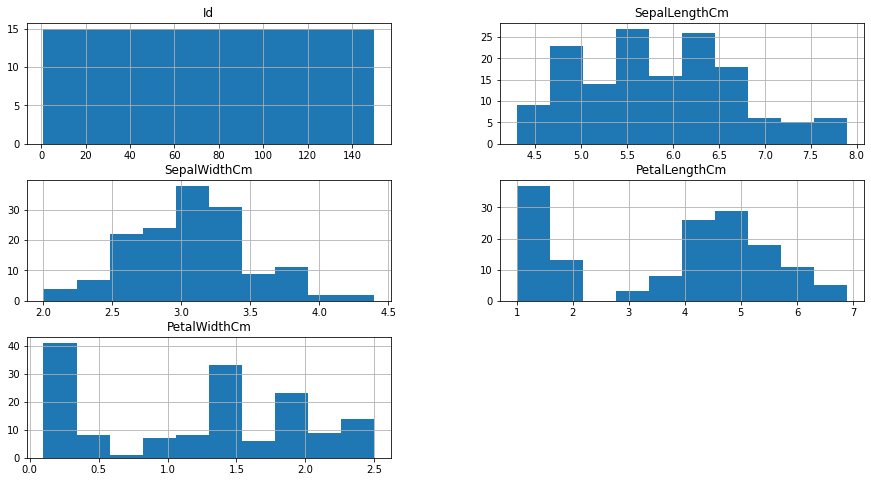

In [12]:
df.hist()
plt.show()

From above we can see that data is not normal

In [13]:
target=df['Species']

In [14]:
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [15]:
X=df.drop(['Species','Id'],axis=1)
y=df['Species']
print(X.shape,y.shape)

(150, 4) (150,)


## Trainig the model

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)
print("Traingin split:",X_train.shape)
print("Testin spllit:",X_test.shape)

Traingin split: (120, 4)
Testin spllit: (30, 4)


## Defining Decision Tree Algorithm

In [18]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

## Classification Report and Confusion Matrix

In [19]:
y_pred=dt.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



## plot Confusion Matrix

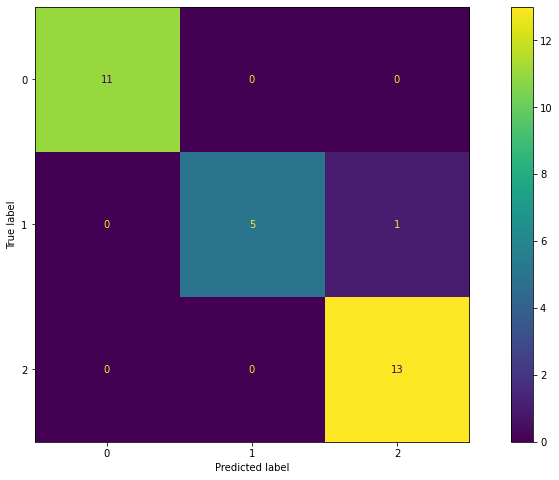

In [20]:
plot_confusion_matrix(dt,X_test,y_test)

In [21]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print('Cohen_kappa Score:',cohen_kappa_score(y_test,y_pred))

Accuracy: 0.9666666666666667
Cohen_kappa Score: 0.9470899470899471


## Visualization of trained model

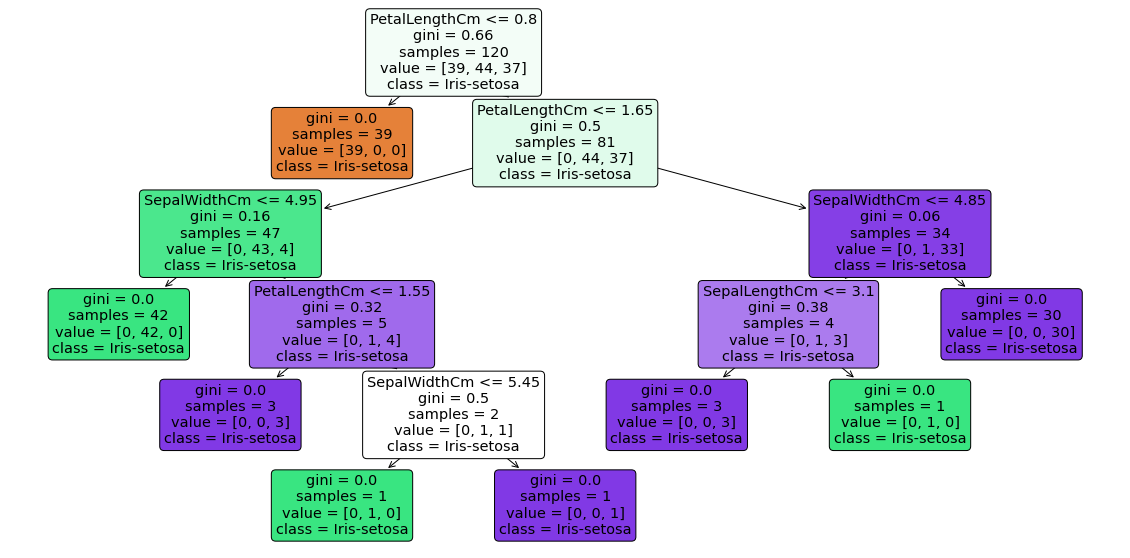

In [23]:
#visualizing the graph
plt.figure(figsize=(20,10))
tree=plot_tree(dt,feature_names=df.columns,precision=2,rounded=True,filled=True,class_names=target.values)

* The Descision Tree Classifier is created and is visaulized graphically. Also the prediction was calculated using decision tree algorithm and accuracy of the model was evaluated.

# E N D